In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A function that returns the vector of expected hitting times for the Markov chain representing our CUSUM process.
# (1) n - 1 is the size of the upward step in the CUSUM process.
# (2) q is the probability that a product is defective. Under the null hypothesis q should be set equal to 1 / n. 
# (3) h determines when the CUSUM process raises an alarm (i.e., signals that a change may have occurred).
def expected_hitting_times(n, q, h):

    # Build the Markov transition matrix.

    # Start with a matrix filled with zeros.
    P = np.zeros((h + 1, h + 1))

    # Add the diagonal entry for the absorbing state first.
    P[h, h] = 1

    # Then add the rest of the non-zero elements.
    for s in range(h):
        
        # Define the score values t_plus and t_minus that can be reached from s in one step.
        t_plus = min([s + n - 1, h])
        t_minus = max([s - 1, 0])
    
        # Add the probabilities for transitioning to t_plus and t_minus from s in one step
        P[s, t_plus] = q
        P[s, t_minus] = 1 - q
    
    
    # Define the submatrix R that is obtained from P by removing the last row and column.
    R = P[:h,:h]

    # Define the column vector of ones of size h.
    one_vec = np.ones((h, 1))

    # Compute the vector t of expected hitting times.
    t = np.matmul(np.linalg.inv(np.identity(h) - R), one_vec)
    
    # t currently has shape (h, 1). We'll use np.squeeze() to reshape it to (h,) before returning it.

    return np.squeeze(t, axis = 1)

In [3]:
# Compute the ARLs under the null and alternative hypotheses that we quoted in the first blog post on CUSUM.

# Null hypothesis:
# n = 20, q_0 = 0.05 = 1 / n, h = 63, we have ARL = 254.9
print(expected_hitting_times(20, 0.05, 63)[0])

# Alternative hypothesis:
# n = 20, q_1 = 0.1, h = 63, we have ARL = 58.5
print(expected_hitting_times(20, 0.1, 63)[0])

254.92059138943347
58.47810962943749


In [4]:
# Compute the Average Run Length (ARL) under the null hypothesis for a range of different values of h.

n = 20
q_0 = 1 / n

h_values = [i for i in range(1, 71)]
ARL_values = [0] * len(h_values)

for i in range(len(h_values)):
    ARL_values[i] = expected_hitting_times(n, q_0, h_values[i])[0] # The ARL is the expected hitting time starting from 0.
    

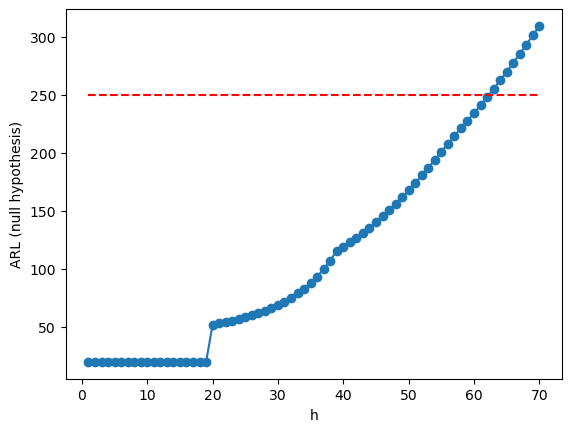

In [5]:
# Plot the Average Run Length (ARL) under the null hypothesis for a range of different values of h.

plt.plot(h_values, ARL_values, marker = 'o', linestyle = '-')
plt.plot(h_values, [250] * len(h_values), linestyle = '--', color = 'r')

plt.xlabel('h')    
plt.ylabel('ARL (null hypothesis)')
plt.show()

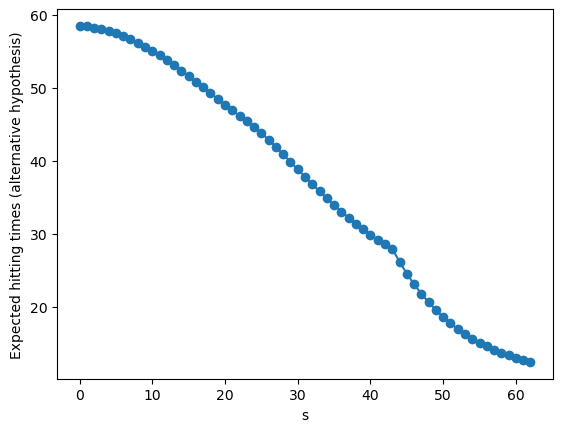

In [6]:
# Plot the expected hitting times under the alternative hypothesis for all possible starting values s of the modified score.

# Our chosen parameters for CUSUM.
n = 20
h = 63

# Value of q under the alternative hypothesis.
q_1 = 0.1

s = [i for i in range(h)]

t = expected_hitting_times(n, q_1, h)

plt.plot(s, t, marker = 'o', linestyle = '-')

plt.xlabel('s')    
plt.ylabel('Expected hitting times (alternative hypothesis)')
plt.show()